### Dsverifier Stability
teste_Todas

In [2]:
import tensorflow

__Etapas__:

* Análise de Dados

* Transformação dos Dados
    * Conversão para Números
    * Conversão para Binários
    
* Resultados
    * Treinamento e Classificação




Accuracy

## Códigos base para implementação de AM e de rede neural em Keras

In [3]:
import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np
import pandas as pd
import time
import os
from sklearn import datasets, svm, metrics
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score as sklearn_roc_auc_score
from sklearn.metrics import accuracy_score as sklearn_accuracy_score
from sklearn.metrics import confusion_matrix as sklearn_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [4]:
from keras import backend as K
from keras.layers import Input, Dense, Activation, BatchNormalization, Dropout
from keras.models import Model
from keras.optimizers import Nadam, SGD,Adam
from keras.callbacks import EarlyStopping
import seaborn as sns

Using TensorFlow backend.


## Analise dos Dados da Base

In [5]:
base_path='baseCase01Stability1.csv'
base = pd.read_csv(base_path)

### Para mostrar os 5 primeiros registros usamos a função 'head()'

In [6]:
base.head()

,Digital_System_Name_(original_name),Implementation_Integer_bits(i),Implementation_fractional_bits(j),Bit,Realization,Uncertainty_plan,a1_plan,a2_plan,b1_plan,b2_plan,Class
0,cruise,1,6,7,DFI,0.0,0,0.000683,0.7,-1.2366,Fail
1,cruise,1,6,7,DFI,0.0,0,0.000741,0.7,-1.2366,Fail
2,cruise,1,6,7,DFI,0.0,0,0.000800,0.7,-1.2366,Fail
3,cruise,1,6,7,DFI,0.0,0,0.000858,0.7,-1.2366,Fail
4,cruise,1,6,7,DFI,0.0,0,0.000917,0.7,-1.2366,Fail


In [7]:
base.drop(['Digital_System_Name_(original_name)','Realization'], axis=1,inplace=True)
base.head()

,Implementation_Integer_bits(i),Implementation_fractional_bits(j),Bit,Uncertainty_plan,a1_plan,a2_plan,b1_plan,b2_plan,Class
0,1,6,7,0.0,0,0.000683,0.7,-1.2366,Fail
1,1,6,7,0.0,0,0.000741,0.7,-1.2366,Fail
2,1,6,7,0.0,0,0.000800,0.7,-1.2366,Fail
3,1,6,7,0.0,0,0.000858,0.7,-1.2366,Fail
4,1,6,7,0.0,0,0.000917,0.7,-1.2366,Fail


In [8]:
colunas = base.drop(['Class'], axis=1).columns
colunas

Index([u'Implementation_Integer_bits(i)', u'Implementation_fractional_bits(j)',
       u'Bit', u'Uncertainty_plan', u'a1_plan', u'a2_plan', u'b1_plan',
       u'b2_plan'],
      dtype='object')

### Abaixo seguem os histogramas dos atributos númericos

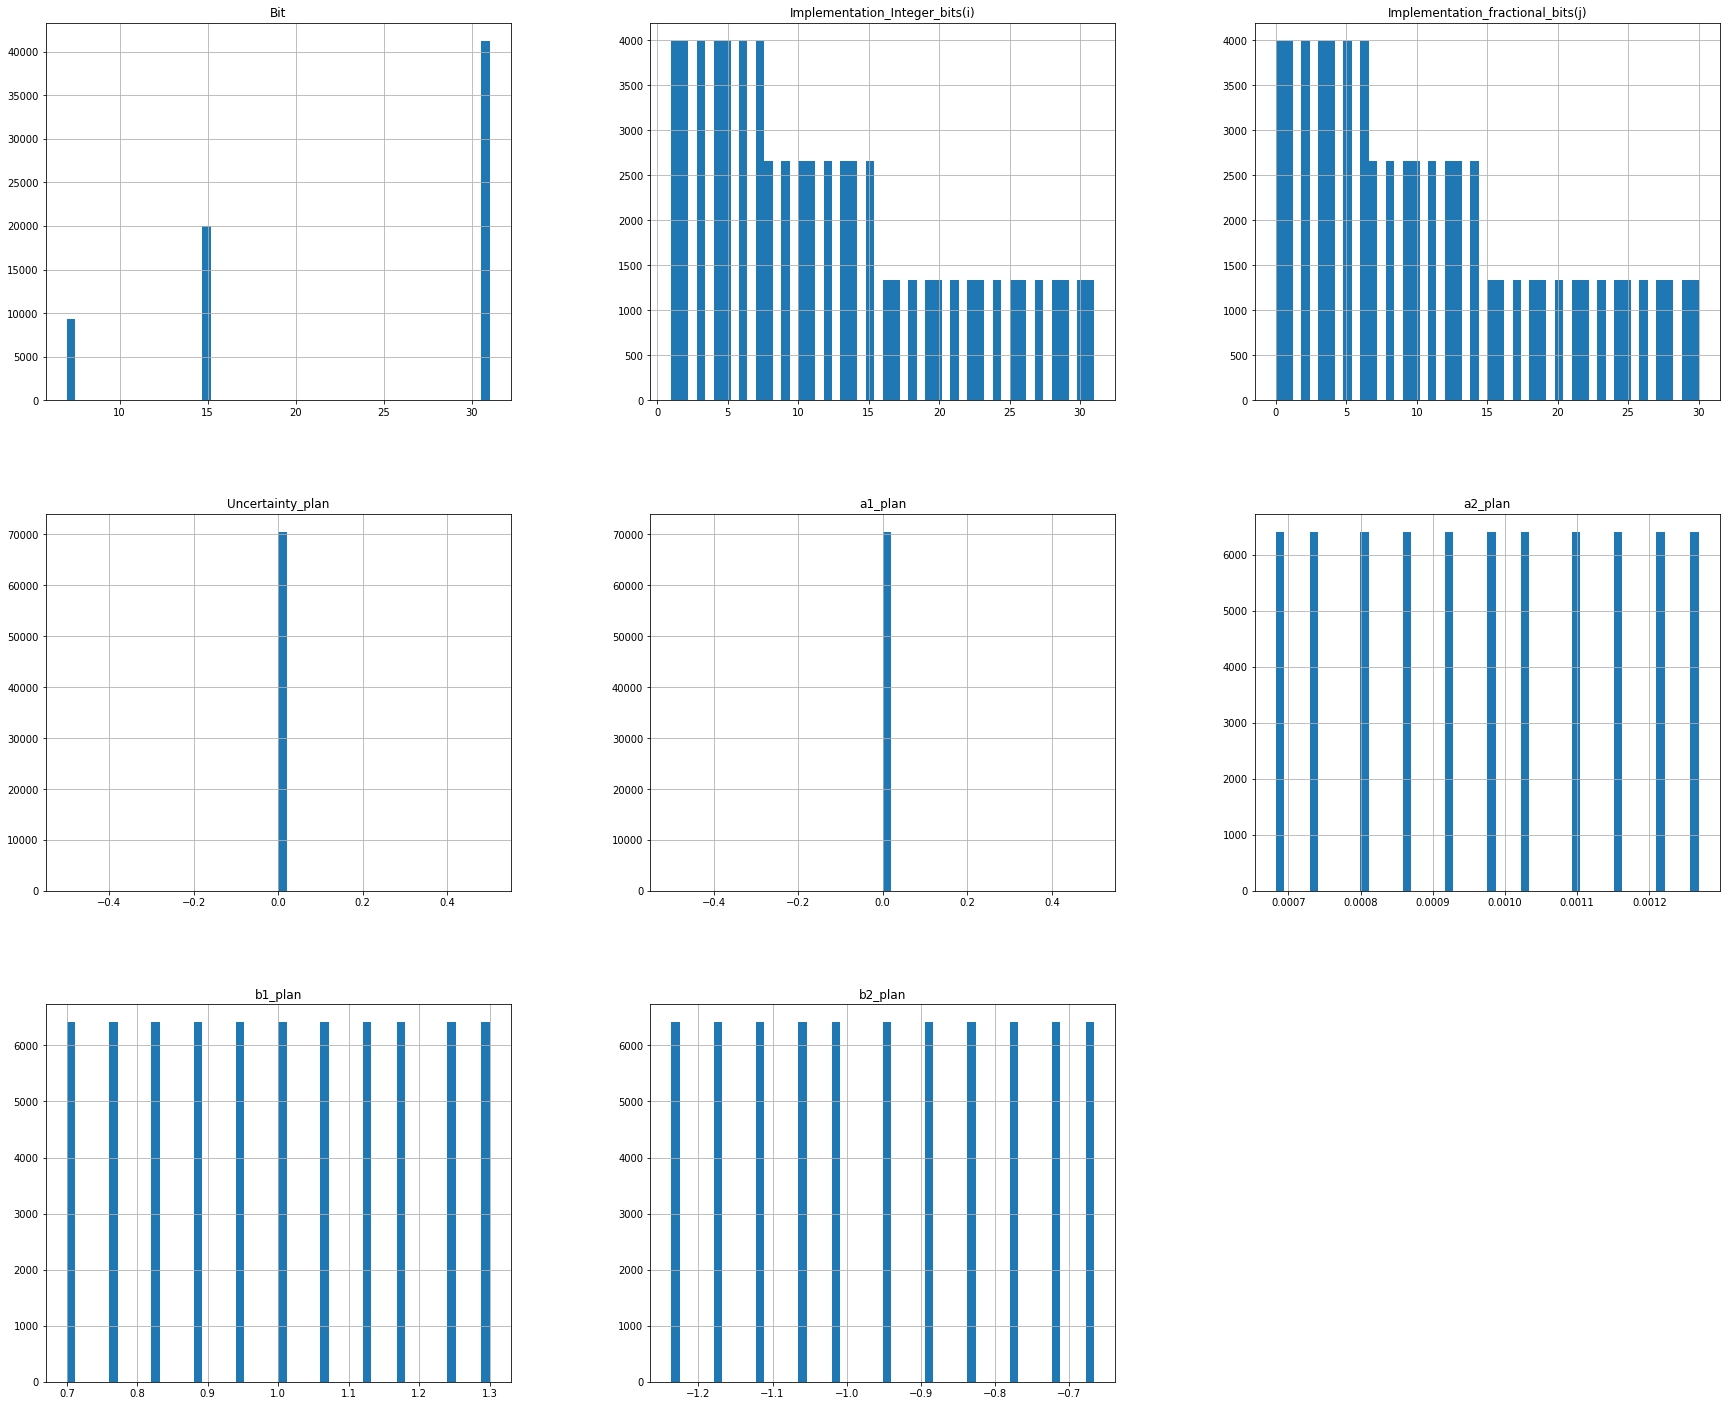

In [9]:
base.hist(bins=50, figsize=(30,25))
plt.show()

## Transformação dos Dados

### Conversão para binários

In [10]:
for c in colunas:
    dummies = pd.get_dummies(base[c], prefix = c)
    base = base.drop(c, axis = 1).join(dummies)

In [11]:
base.head(3)

,Class,Implementation_Integer_bits(i)_1,Implementation_Integer_bits(i)_2,Implementation_Integer_bits(i)_3,Implementation_Integer_bits(i)_4,Implementation_Integer_bits(i)_5,Implementation_Integer_bits(i)_6,Implementation_Integer_bits(i)_7,Implementation_Integer_bits(i)_8,Implementation_Integer_bits(i)_9,...,b2_plan_-1.1795,b2_plan_-1.1224,b2_plan_-1.0653,b2_plan_-1.0083,b2_plan_-0.9512,b2_plan_-0.89413,b2_plan_-0.83706,b2_plan_-0.77998,b2_plan_-0.72291,b2_plan_-0.66584
0,Fail,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fail,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fail,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


A função 'get_dummies' transforma os campos em atributos binários. Logo, podemos incorporar esses novos campos ao dataframe

In [12]:
base['Class'] = base['Class'].astype('category').cat.codes

transforma a class em número

In [13]:
base.head()

,Class,Implementation_Integer_bits(i)_1,Implementation_Integer_bits(i)_2,Implementation_Integer_bits(i)_3,Implementation_Integer_bits(i)_4,Implementation_Integer_bits(i)_5,Implementation_Integer_bits(i)_6,Implementation_Integer_bits(i)_7,Implementation_Integer_bits(i)_8,Implementation_Integer_bits(i)_9,...,b2_plan_-1.1795,b2_plan_-1.1224,b2_plan_-1.0653,b2_plan_-1.0083,b2_plan_-0.9512,b2_plan_-0.89413,b2_plan_-0.83706,b2_plan_-0.77998,b2_plan_-0.72291,b2_plan_-0.66584
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
base.Class.value_counts()

0    45566
1    24977
Name: Class, dtype: int64

Exibe a quantidade de linhas e colunas (atributos)

In [15]:
y = base['Class'].values
X = base.drop("Class", axis=1).values

In [16]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [17]:
X.shape

(70543, 100)

In [18]:
X[:1]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [19]:
y.shape

(70543,)

In [20]:
y[:1]

array([0], dtype=int8)

## Resultados

Os experimentos foram executados para cada algoritmos: Random Forest, SVM, Naive Bayes, Decision Trees, Nearest Neighbors, Rede Neural Simples, Rede Neural com normalização em Batch, Rede Neural com Dropout e Rede Neural com normalização em Batch e Dropout. Foi utilizado Kfolds k=10 dividir a base em 10 subconjuntos (treinamento e teste).

Validação cruzada K-Folds
Fornece índices de treino / teste para dividir os dados nos conjuntos de treinamento / teste. Dividir o conjunto de dados em k dobras consecutivas (sem embaralhar por padrão). Cada dobra é então usada uma vez como validação, enquanto as dobras remanescentes k - 1 formam o conjunto de treino.

No aprendizado de máquina, geralmente dividimos o conjunto de dados em conjunto de dados de treinamento, conjunto de dados de validação e conjunto de dados de teste.

In [21]:
kf = StratifiedKFold(n_splits=10)
kf.get_n_splits(X,y)
print(kf)
#KFold(n_splits=10, random_state=None, shuffle=False)
#for train_index, test_index in kf.split(X):
#    X_train, X_test = X[train_index], X[test_index]
#    y_train, y_test = y[train_index], y[test_index]

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


# Algoritmos de Aprendizagem de Máquina

## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [25]:
n_estimators = 70
acc = []
prec = []
rec = []
f1 = []
mc = []
t1=time.time()
y_hat = np.zeros(len(X))

for train_index, test_index in kf.split(X,y): 
    clf_rf = RandomForestClassifier(n_estimators=n_estimators, random_state=50)
    clf_rf.fit(X[train_index], y[train_index])
    y_hat[test_index] = clf_rf.predict(X[test_index])

t2=time.time()

acc = accuracy_score(y, y_hat)
prec = precision_score(y, y_hat)
rec = recall_score(y, y_hat)
f1 = (2*prec*rec)/(prec+rec)
mc = confusion_matrix(y, y_hat)

temp = (t2-t1) # tempo (s) 

print(acc)
print(prec)
print(rec)
print(f1)
print(mc)
print(temp)


#labels = {'n_estimators':n_estimators, 'accuracy_rf':acc, 'rate precision':prec, 'rate recall':rec, 'f1':f1, 'confusion matrix':mc, 'tempo':temp}
#results1 = 'results1' 
#with open(os.path.join(results1, '/home/maria/jupyter/results1/random_forest_1.txt'), 'w') as fp:
#    for i in labels:
#        fp.write('{}:{}\n'.format(i,labels[i]))



0.569014643550742
0.40502030527937266
0.4631861312407415
0.43215479725817607
[[28571 16995]
 [13408 11569]]
60.8681371212


Feature Importance

In [27]:
for name, importance in zip(base.drop("Class", axis=1).columns, clf_rf.feature_importances_):
    print(name,importance)

('Implementation_Integer_bits(i)_1', 0.006350303690419332)
('Implementation_Integer_bits(i)_2', 0.006179250179434806)
('Implementation_Integer_bits(i)_3', 0.007226309620030117)
('Implementation_Integer_bits(i)_4', 0.007852759452872666)
('Implementation_Integer_bits(i)_5', 0.005947849652173488)
('Implementation_Integer_bits(i)_6', 0.007883240622763521)
('Implementation_Integer_bits(i)_7', 0.003985847568602466)
('Implementation_Integer_bits(i)_8', 0.0028760470954132603)
('Implementation_Integer_bits(i)_9', 0.0020833195606677186)
('Implementation_Integer_bits(i)_10', 0.0016368440679094588)
('Implementation_Integer_bits(i)_11', 0.0014079384250595519)
('Implementation_Integer_bits(i)_12', 0.002134005222026039)
('Implementation_Integer_bits(i)_13', 0.002983589504860064)
('Implementation_Integer_bits(i)_14', 0.0031126399157076095)
('Implementation_Integer_bits(i)_15', 0.002860503586795237)
('Implementation_Integer_bits(i)_16', 0.0001712651331694998)
('Implementation_Integer_bits(i)_17', 0.000

Exibe as importâncias dos atributos na base

## SVM

In [35]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [36]:
C=1000
acc = []
prec = []
rec = []
f1 = []
mc = []
t1=time.time()
y_hat = np.zeros(len(X))

for train_index, test_index in kf.split(X,y): 
    clf_svm = svm.SVC(C=C, random_state=42)
    clf_svm.fit(X[train_index], y[train_index])
    y_hat[test_index] = clf_svm.predict(X[test_index])

t2=time.time()

acc = accuracy_score(y, y_hat)
prec = precision_score(y, y_hat)
rec = recall_score(y, y_hat)
f1 = (2*prec*rec)/(prec+rec)
mc = confusion_matrix(y, y_hat)

temp = (t2-t1) # tempo (s) 

print(acc)
print(prec)
print(rec)
print(f1)
print(mc)
print(temp)


#labels = {'c':c, 'accuracy_svm':acc, 'rate precision':prec, 'rate recall':rec, 'f1':f1, 'confusion matrix':mc, 'tempo':temp}
#results1 = 'results1' 
#with open(os.path.join(results1, '/home/maria/jupyter/results1/svm_1.txt'), 'w') as fp:
#    for i in labels:
#        fp.write('{}:{}\n'.format(i,labels[i]))



/home/maria/tf/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/maria/tf/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/maria/tf/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/maria/tf/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarni

0.8812072069517882
0.8476393950818986
0.8101052968731233
0.8284474287585981
[[41929  3637]
 [ 4743 20234]]
800.9172005653381


## Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [38]:
acc = []
prec = []
rec = []
f1 = []
mc = []
t1=time.time()
y_hat = np.zeros(len(X))

for train_index, test_index in kf.split(X,y): 
    clf_gnb = GaussianNB()
    clf_gnb.fit(X[train_index], y[train_index])
    y_hat[test_index] = clf_gnb.predict(X[test_index])

t2=time.time()

acc = accuracy_score(y, y_hat)
prec = precision_score(y, y_hat)
rec = recall_score(y, y_hat)
f1 = (2*prec*rec)/(prec+rec)
mc = confusion_matrix(y, y_hat)

temp = (t2-t1) # tempo (s) 

print(acc)
print(prec)
print(rec)
print(f1)
print(mc)
print(temp)

#labels = {'accuracy_nb':acc, 'rate precision':prec, 'rate recall':rec, 'f1':f1, 'confusion matrix':mc, 'tempo':temp}
#results1 = 'results1' 
#with open(os.path.join(results1, '/home/maria/jupyter/results1/naive_bayes.txt'), 'w') as fp:
#    for i in labels:
#        fp.write('{}:{}\n'.format(i,labels[i]))



0.6268233559672823
0.46850172913356386
0.40136925971894144
0.43234501347708887
[[34193 11373]
 [14952 10025]]
1.3611550331115723


## Decision Trees

In [39]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [40]:
min_samples_split=9
acc = []
prec = []
rec = []
f1 = []
mc = []
t1=time.time()
y_hat = np.zeros(len(X))

for train_index, test_index in kf.split(X,y): 
    clf_dt = tree.DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=42)
    clf_dt.fit(X[train_index], y[train_index])
    y_hat[test_index] = clf_dt.predict(X[test_index])

t2=time.time()

acc = accuracy_score(y, y_hat)
prec = precision_score(y, y_hat)
rec = recall_score(y, y_hat)
f1 = (2*prec*rec)/(prec+rec)
mc = confusion_matrix(y, y_hat)

temp = (t2-t1) # tempo (s) 

print(acc)
print(prec)
print(rec)
print(f1)
print(mc)
print(temp)

#labels = {'min_samples_split':min_samples_split, 'accuracy_dt':acc, 'rate precision':prec, 'rate recall':rec, 'f1':f1, 'confusion matrix':mc, 'tempo':temp}
#results1 = 'results1' 
#with open(os.path.join(results1, '/home/maria/jupyter/results1/decision_tree_1.txt'), 'w') as fp:
#    for i in labels:
#        fp.write('{}:{}\n'.format(i,labels[i]))


0.7091419417943665
0.5668375453428066
0.7570164551387276
0.6482668769499778
[[31117 14449]
 [ 6069 18908]]
7.0824244022369385


In [41]:
clf_dt = tree.DecisionTreeClassifier()
clf_dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Nearest Neighbors

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [43]:
n_neighbors=1
acc = []
prec = []
rec = []
f1 = []
mc = []
t1=time.time()
y_hat = np.zeros(len(X))

for train_index, test_index in kf.split(X,y):
    clf_neigh = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf_neigh.fit(X[train_index], y[train_index])
    y_hat[test_index] = clf_neigh.predict(X[test_index])

t2=time.time()

acc = accuracy_score(y, y_hat)
prec = precision_score(y, y_hat)
rec = recall_score(y, y_hat)
f1 = (2*prec*rec)/(prec+rec)
mc = confusion_matrix(y, y_hat)

temp = (t2-t1) # tempo (s) 

print(acc)
print(prec)
print(rec)
print(f1)
print(mc)
print(temp)

#labels = {'n_neighbors':n_neighbors, 'accuracy_nn':acc, 'rate precision':prec, 'rate recall':rec, 'f1':f1, 'confusion matrix':mc, 'tempo':temp}
#results1 = 'results1' 
#with open(os.path.join(results1, '/home/maria/jupyter/results1/knn_1.txt'), 'w') as fp:
#    for i in labels:
#        fp.write('{}:{}\n'.format(i,labels[i]))


0.5093630835093489
0.26885796545105567
0.22432638026984825
0.2445817054804985
[[30329 15237]
 [19374  5603]]
154.02076077461243


In [44]:
clf_neigh = KNeighborsClassifier()
clf_neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Adaboost

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [47]:
n_estimators = 40
learning_rate=1.0
acc = []
prec = []
rec = []
f1 = []
mc = []
t1=time.time()
y_hat = np.zeros(len(X))

for train_index, test_index in kf.split(X,y): 
    clf_ad = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, algorithm='SAMME.R', random_state=42)
    clf_ad.fit(X[train_index], y[train_index])
    y_hat[test_index] = clf_ad.predict(X[test_index])

t2=time.time()

acc = accuracy_score(y, y_hat)
prec = precision_score(y, y_hat)
rec = recall_score(y, y_hat)
f1 = (2*prec*rec)/(prec+rec)
mc = confusion_matrix(y, y_hat)

temp = (t2-t1) # tempo (s) 

print(acc)
print(prec)
print(rec)
print(f1)
print(mc)
print(temp)

#labels = {'n_estimators':n_estimators, 'learning_rate':learning_rate, 'accuracy_dt':acc, 'rate precision':prec, 'rate recall':rec, 'f1':f1, 'confusion matrix':mc, 'tempo':temp}
#results1 = 'results1' 
#with open(os.path.join(results1, '/home/maria/jupyter/results1/ab_1.txt'), 'w') as fp:
#    for i in labels:
#        fp.write('{}:{}\n'.format(i,labels[i]))


0.900032604227209
0.8037826661695421
0.9494334788004964
0.8705580029368576
[[39777  5789]
 [ 1263 23714]]
51.72462773323059


# Rede Neural

Os parâmetros modificados foram: a camada de entrada [10~200], nas camadas escondidas [100 e 200], a função de ativação hard_sigmoid() e relu() e Dropout [0.5 e 0.7]. Foram utilizadas 3 camadas escondidas, 1 camada de saída (função de ativação hard_sigmoid()) e 1000 épocas.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

## Rede Neural Simples

In [23]:
def plot_model_history(model_history):
    # summarize history for loss
    plt.plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    plt.plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='best')
    plt.show()
    

In [24]:
def get_model(X_input_size):
    '''
        get_model cria um modelo de rede neural  
        X_input_size: número de atributos em X
    '''
    input_data = Input(name='input', shape=(X_input_size,), dtype='float32')
    
    x = input_data
    x = Dense(units = 200)(x)
    x = Activation('relu')(x)
      
    #--------------------------
    x = Dense(units = 200)(x)
    x = Activation('softmax')(x)
    
    x = Dense(units = 200)(x)
    x = Activation('softmax')(x)
    
    x = Dense(units = 200)(x)
    x = Activation('softmax')(x)
    #--------------------------
    
    x = Dense(units = 1)(x)
    y_pred = Activation('relu')(x)
    
    model = Model(inputs=input_data, outputs=y_pred)
    
    # modelo será treinado com otimizador SGD -- vc pode trocar o otimizador
    #optimizer = SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)
    optimizer = Adam(lr=0.0001)
    
    # função de custo usada é a entropia cruzada
    model.compile(loss='binary_crossentropy', optimizer = optimizer,metrics=['accuracy']) 
    
    return model

In [25]:
def train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20):

    # estratégia de treino com parada antecipada consiste em parar o treino
    # quando nenhuma melhoria no erro de validação (val_loss) é observada após
    # "patience" épocas
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=patience, \
                verbose=1, mode='auto')
    callback_list = [earlystop]
    
    # Modelo usa parâmetros comuns que podem ser modificados
    h = model.fit(X_train, y_train, batch_size=bsize, epochs=n_epochs,validation_data=(X_test,y_test),
                  verbose=2, shuffle = True, callbacks = callback_list, 
                  validation_split=val_proportion)
    plot_model_history(h)          
    
    # avaliação
    print('\nEstimating AUCROC, acc')
    y_pred = model.predict(X_test, batch_size=len(y_test))
    print('ROC value: %.4f'%(sklearn_roc_auc_score(y_test, y_pred)))
    print('Acc: %.4f'%(sklearn_accuracy_score(y_test, y_pred>0.5)))
    print('CMatrix: %s'%(sklearn_confusion_matrix(y_test, y_pred>0.5)))
    
    return model

In [26]:
X_train.shape

(63488, 100)

In [27]:
model=get_model(X_train.shape[1])

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
activation_2 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
activation_3 (Activation)    (None, 200)               0         
__________

In [ ]:
train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20)


Train on 63488 samples, validate on 7055 samples
Epoch 1/1000


## Rede Neural com normalização em Batch

In [56]:
def plot_model_history(model_history):
    # summarize history for loss
    plt.plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    plt.plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='best')
    plt.show()

In [57]:
def get_model(X_input_size):
    '''
        get_model cria um modelo de rede neural  
        X_input_size: número de atributos em X
    '''
    input_data = Input(name='input', shape=(X_input_size,), dtype='float32')
    
    x = input_data
    x = Dense(units = 80)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
     
    #--------------------------
    x = Dense(units = 200)(x)
    x = BatchNormalization()(x)
    x = Activation('softmax')(x)
    
    x = Dense(units = 200)(x)
    x = BatchNormalization()(x)
    x = Activation('softmax')(x)
    
    x = Dense(units = 200)(x)
    x = BatchNormalization()(x)
    x = Activation('softmax')(x)      
    #--------------------------
    
    x = Dense(units = 1)(x)
    y_pred = Activation('relu')(x)
    
    model = Model(inputs=input_data, outputs=y_pred)
    
    # modelo será treinado com otimizador SGD -- vc pode trocar o otimizador
    #optimizer = SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)
    optimizer = Adam(lr=0.0001)
    
    # função de custo usada é a entropia cruzada
    model.compile(loss='binary_crossentropy', optimizer = optimizer,metrics=['accuracy']) 
    
    return model

In [58]:
def train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20):

    # estratégia de treino com parada antecipada consiste em parar o treino
    # quando nenhuma melhoria no erro de validação (val_loss) é observada após
    # "patience" épocas
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=patience, \
                verbose=1, mode='auto')
    callback_list = [earlystop]
    
    # Modelo usa parâmetros comuns que podem ser modificados
    h = model.fit(X_train, y_train, batch_size=bsize, epochs=n_epochs,validation_data=(X_test,y_test),
                  verbose=2, shuffle = True, callbacks = callback_list, 
                  validation_split=val_proportion)
    plot_model_history(h)          
    
    # avaliação
    print('\nEstimating AUCROC, acc')
    y_pred = model.predict(X_test, batch_size=len(y_test))
    print('ROC value: %.4f'%(sklearn_roc_auc_score(y_test, y_pred)))
    print('Acc: %.4f'%(sklearn_accuracy_score(y_test, y_pred>0.5)))
    print('CMatrix: %s'%(sklearn_confusion_matrix(y_test, y_pred>0.5)))
    
    return model

In [59]:
X_train.shape

(63488, 100)

In [60]:
model=get_model(X_train.shape[1])

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 80)                8080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 80)                320       
_________________________________________________________________
activation_6 (Activation)    (None, 80)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 200)               16200     
_________________________________________________________________
batch_normalization_2 (Batch (None, 200)               800       
_________________________________________________________________
activation_7 (Activation)    (None, 200)               0         
__________

Train on 63488 samples, validate on 7055 samples
Epoch 1/1000
 - 20s - loss: 0.7180 - acc: 0.6468 - val_loss: 0.4597 - val_acc: 0.6380
Epoch 2/1000
 - 19s - loss: 0.3411 - acc: 0.7529 - val_loss: 0.2004 - val_acc: 0.9888
Epoch 3/1000
 - 20s - loss: 0.1523 - acc: 0.9673 - val_loss: 0.0469 - val_acc: 0.9895
Epoch 4/1000
 - 19s - loss: 0.0867 - acc: 0.9749 - val_loss: 0.0239 - val_acc: 0.9905
Epoch 5/1000
 - 19s - loss: 0.0768 - acc: 0.9777 - val_loss: 0.0229 - val_acc: 0.9919
Epoch 6/1000
 - 19s - loss: 0.0692 - acc: 0.9787 - val_loss: 0.0233 - val_acc: 0.9905
Epoch 7/1000
 - 19s - loss: 0.0686 - acc: 0.9794 - val_loss: 0.0211 - val_acc: 0.9929
Epoch 8/1000
 - 19s - loss: 0.0648 - acc: 0.9806 - val_loss: 0.0209 - val_acc: 0.9939
Epoch 9/1000
 - 19s - loss: 0.0650 - acc: 0.9800 - val_loss: 0.0215 - val_acc: 0.9914
Epoch 10/1000
 - 19s - loss: 0.0585 - acc: 0.9826 - val_loss: 0.0188 - val_acc: 0.9938
Epoch 11/1000
 - 19s - loss: 0.0553 - acc: 0.9829 - val_loss: 0.0179 - val_acc: 0.9943
Epo

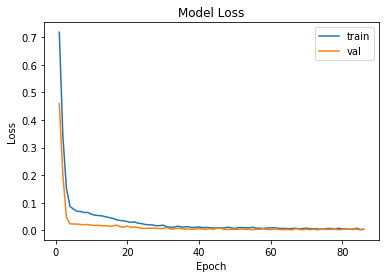


Estimating AUCROC, acc
ROC value: 0.9998
Acc: 0.9989
CMatrix: [[4500    1]
 [   7 2547]]


In [62]:
train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20)

## Rede Neural com Dropout

In [63]:
def plot_model_history(model_history):
    # summarize history for loss
    plt.plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    plt.plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='best')
    plt.show()

In [64]:
def get_model(X_input_size):
    '''
        get_model cria um modelo de rede neural  
        X_input_size: número de atributos em X
    '''
    input_data = Input(name='input', shape=(X_input_size,), dtype='float32')
    
    x = input_data
    x = Dense(units = 200)(x)
    x = Activation('relu')(x)
    x = Dropout(0.7)(x)
    
    #--------------------------
    x = Dense(units = 200)(x)
    x = Activation('softmax')(x)
    x = Dropout(0.7)(x)   
    
    x = Dense(units = 200)(x)
    x = Activation('softmax')(x)
    x = Dropout(0.7)(x) 
    
    x = Dense(units = 200)(x)
    x = Activation('softmax')(x)
    x = Dropout(0.7)(x)    
    #--------------------------
    
    x = Dense(units = 1)(x)
    y_pred = Activation('relu')(x)
    
    model = Model(inputs=input_data, outputs=y_pred)
    
    # modelo será treinado com otimizador SGD -- vc pode trocar o otimizador
    #optimizer = SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)
    optimizer = Adam(lr=0.0001)
    
    # função de custo usada é a entropia cruzada
    model.compile(loss='binary_crossentropy', optimizer = optimizer,metrics=['accuracy']) 
    
    return model

In [65]:
def train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20):

    # estratégia de treino com parada antecipada consiste em parar o treino
    # quando nenhuma melhoria no erro de validação (val_loss) é observada após
    # "patience" épocas
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=patience, \
                verbose=1, mode='auto')
    callback_list = [earlystop]
    
    # Modelo usa parâmetros comuns que podem ser modificados
    h = model.fit(X_train, y_train, batch_size=bsize, epochs=n_epochs,validation_data=(X_test,y_test),
                  verbose=2, shuffle = True, callbacks = callback_list, 
                  validation_split=val_proportion)
    plot_model_history(h)          
    
    # avaliação
    print('\nEstimating AUCROC, acc')
    y_pred = model.predict(X_test, batch_size=len(y_test))
    print('ROC value: %.4f'%(sklearn_roc_auc_score(y_test, y_pred)))
    print('Acc: %.4f'%(sklearn_accuracy_score(y_test, y_pred>0.5)))
    print('CMatrix: %s'%(sklearn_confusion_matrix(y_test, y_pred>0.5)))
    
    return model

In [66]:
X_train.shape

(63488, 100)

In [67]:
model=get_model(X_train.shape[1])

In [68]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 200)               20200     
_________________________________________________________________
activation_11 (Activation)   (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 200)               40200     
_________________________________________________________________
activation_12 (Activation)   (None, 200)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
__________

Train on 63488 samples, validate on 7055 samples
Epoch 1/1000
 - 16s - loss: 1.2862 - acc: 0.6468 - val_loss: 0.9921 - val_acc: 0.6380
Epoch 2/1000
 - 16s - loss: 0.8561 - acc: 0.6468 - val_loss: 0.7683 - val_acc: 0.6380
Epoch 3/1000
 - 16s - loss: 0.6996 - acc: 0.6468 - val_loss: 0.6680 - val_acc: 0.6380
Epoch 4/1000
 - 16s - loss: 0.6535 - acc: 0.6468 - val_loss: 0.6501 - val_acc: 0.6380
Epoch 5/1000
 - 16s - loss: 0.6435 - acc: 0.6469 - val_loss: 0.6375 - val_acc: 0.6380
Epoch 6/1000
 - 16s - loss: 0.6282 - acc: 0.6488 - val_loss: 0.6048 - val_acc: 0.6380
Epoch 7/1000
 - 16s - loss: 0.5973 - acc: 0.6627 - val_loss: 0.5395 - val_acc: 0.6380
Epoch 8/1000
 - 16s - loss: 0.5398 - acc: 0.6975 - val_loss: 0.4311 - val_acc: 0.6380
Epoch 9/1000
 - 16s - loss: 0.4601 - acc: 0.7463 - val_loss: 0.3076 - val_acc: 0.9904
Epoch 10/1000
 - 16s - loss: 0.3943 - acc: 0.7973 - val_loss: 0.2289 - val_acc: 0.9931
Epoch 11/1000
 - 16s - loss: 0.3529 - acc: 0.8339 - val_loss: 0.1678 - val_acc: 0.9948
Epo

Epoch 95/1000
 - 16s - loss: 0.0344 - acc: 0.7860 - val_loss: 0.0065 - val_acc: 0.6449
Epoch 96/1000
 - 16s - loss: 0.0358 - acc: 0.7849 - val_loss: 0.0104 - val_acc: 0.6442
Epoch 97/1000
 - 16s - loss: 0.0376 - acc: 0.7851 - val_loss: 0.0085 - val_acc: 0.6464
Epoch 00097: early stopping


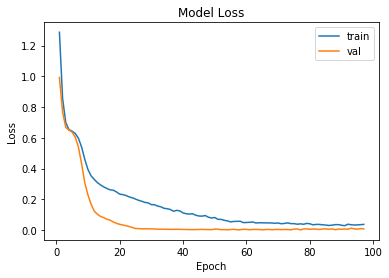


Estimating AUCROC, acc
ROC value: 0.9994
Acc: 0.9989
CMatrix: [[4499    2]
 [   6 2548]]


In [69]:
train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20)

## Rede Neural com  normalização em Batch e Dropout

In [70]:
def plot_model_history(model_history):
    # summarize history for loss
    plt.plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    plt.plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='best')
    plt.show()

In [71]:
def get_model(X_input_size):
    '''
        get_model cria um modelo de rede neural  
        X_input_size: número de atributos em X
    '''
    input_data = Input(name='input', shape=(X_input_size,), dtype='float32')
    
    x = input_data
    x = Dense(units = 200)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.7)(x)
    
    #--------------------------
    x = Dense(units = 200)(x)
    x = BatchNormalization()(x)
    x = Activation('softmax')(x)
    x = Dropout(0.7)(x)   
    
    x = Dense(units = 200)(x)
    x = BatchNormalization()(x)
    x = Activation('softmax')(x)
    x = Dropout(0.7)(x)  
    
    x = Dense(units = 200)(x)
    x = BatchNormalization()(x)
    x = Activation('softmax')(x)
    x = Dropout(0.7)(x)    
    #--------------------------
    
    x = Dense(units = 1)(x)
    y_pred = Activation('relu')(x)
    
    model = Model(inputs=input_data, outputs=y_pred)
    
    # modelo será treinado com otimizador SGD -- vc pode trocar o otimizador
    #optimizer = SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)
    optimizer = Adam(lr=0.0001)
    
    # função de custo usada é a entropia cruzada
    model.compile(loss='binary_crossentropy', optimizer = optimizer,metrics=['accuracy']) 
    
    return model

In [72]:
def train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20):

    # estratégia de treino com parada antecipada consiste em parar o treino
    # quando nenhuma melhoria no erro de validação (val_loss) é observada após
    # "patience" épocas
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=patience, \
                verbose=1, mode='auto')
    callback_list = [earlystop]
    
    # Modelo usa parâmetros comuns que podem ser modificados
    h = model.fit(X_train, y_train, batch_size=bsize, epochs=n_epochs,validation_data=(X_test,y_test),
                  verbose=2, shuffle = True, callbacks = callback_list, 
                  validation_split=val_proportion)
    plot_model_history(h)          
    
    # avaliação
    print('\nEstimating AUCROC, acc')
    y_pred = model.predict(X_test, batch_size=len(y_test))
    print('ROC value: %.4f'%(sklearn_roc_auc_score(y_test, y_pred)))
    print('Acc: %.4f'%(sklearn_accuracy_score(y_test, y_pred>0.5)))
    print('CMatrix: %s'%(sklearn_confusion_matrix(y_test, y_pred>0.5)))
    
    return model

In [73]:
X_train.shape

(63488, 100)

In [74]:
model=get_model(X_train.shape[1])

In [75]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 200)               20200     
_________________________________________________________________
batch_normalization_5 (Batch (None, 200)               800       
_________________________________________________________________
activation_16 (Activation)   (None, 200)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 200)               40200     
_________________________________________________________________
batch_normalization_6 (Batch (None, 200)               800       
__________

Train on 63488 samples, validate on 7055 samples
Epoch 1/1000
 - 25s - loss: 1.0624 - acc: 0.6468 - val_loss: 0.8208 - val_acc: 0.6380
Epoch 2/1000
 - 24s - loss: 0.2537 - acc: 0.9207 - val_loss: 0.1257 - val_acc: 0.9792
Epoch 7/1000
 - 25s - loss: 0.2502 - acc: 0.9251 - val_loss: 0.1122 - val_acc: 0.9864
Epoch 8/1000
 - 24s - loss: 0.2437 - acc: 0.9304 - val_loss: 0.1042 - val_acc: 0.9847
Epoch 9/1000
 - 24s - loss: 0.2389 - acc: 0.9317 - val_loss: 0.1005 - val_acc: 0.9796
Epoch 10/1000
 - 24s - loss: 0.2351 - acc: 0.9330 - val_loss: 0.0953 - val_acc: 0.9848
Epoch 11/1000
 - 24s - loss: 0.2333 - acc: 0.9332 - val_loss: 0.0898 - val_acc: 0.9797
Epoch 12/1000
 - 24s - loss: 0.2433 - acc: 0.9349 - val_loss: 0.0846 - val_acc: 0.9807
Epoch 13/1000
 - 24s - loss: 0.2365 - acc: 0.9390 - val_loss: 0.0782 - val_acc: 0.9820
Epoch 14/1000
 - 25s - loss: 0.2342 - acc: 0.9397 - val_loss: 0.0755 - val_acc: 0.9885
Epoch 15/1000
 - 24s - loss: 0.2296 - acc: 0.9406 - val_loss: 0.0767 - val_acc: 0.9840

Epoch 99/1000
 - 26s - loss: 0.1721 - acc: 0.9522 - val_loss: 0.0212 - val_acc: 0.9940
Epoch 100/1000
 - 25s - loss: 0.1750 - acc: 0.9511 - val_loss: 0.0209 - val_acc: 0.9949
Epoch 101/1000
 - 24s - loss: 0.1755 - acc: 0.9514 - val_loss: 0.0213 - val_acc: 0.9943
Epoch 102/1000
 - 25s - loss: 0.1785 - acc: 0.9512 - val_loss: 0.0211 - val_acc: 0.9946
Epoch 103/1000
 - 26s - loss: 0.1826 - acc: 0.9507 - val_loss: 0.0214 - val_acc: 0.9938
Epoch 104/1000
 - 24s - loss: 0.1872 - acc: 0.9489 - val_loss: 0.0216 - val_acc: 0.9926
Epoch 105/1000
 - 26s - loss: 0.1772 - acc: 0.9501 - val_loss: 0.0218 - val_acc: 0.9940
Epoch 106/1000
 - 26s - loss: 0.1747 - acc: 0.9494 - val_loss: 0.0212 - val_acc: 0.9939
Epoch 107/1000
 - 27s - loss: 0.1728 - acc: 0.9491 - val_loss: 0.0217 - val_acc: 0.9935
Epoch 108/1000
 - 26s - loss: 0.1901 - acc: 0.9482 - val_loss: 0.0214 - val_acc: 0.9925
Epoch 109/1000
 - 26s - loss: 0.1888 - acc: 0.9496 - val_loss: 0.0220 - val_acc: 0.9922
Epoch 110/1000
 - 25s - loss: 0.1

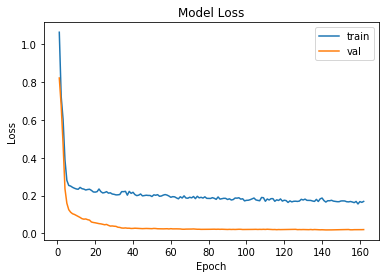


Estimating AUCROC, acc
ROC value: 0.9998
Acc: 0.9925
CMatrix: [[4489   12]
 [  41 2513]]


In [76]:
train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20)

## Rede Neural - LSTM

In [95]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import warnings


from .. import backend as K
from .. import activations
from .. import initializers
from .. import regularizers
from .. import constraints
from ..engine.base_layer import Layer
from ..engine.base_layer import disable_tracking
from ..engine.base_layer import InputSpec
from ..utils.generic_utils import has_arg
from ..utils.generic_utils import to_list

# Legacy support.
from ..legacy.layers import Recurrent
from ..legacy import interfaces

SystemError: Parent module '' not loaded, cannot perform relative import

In [78]:
keras.layers.LSTM(units, activation='tanh', 
    recurrent_activation='hard_sigmoid', use_bias=True, 
    kernel_initializer='glorot_uniform', 
    recurrent_initializer='orthogonal', 
    bias_initializer='zeros',
    unit_forget_bias=True,
                  
    kernel_regularizer=None, 
    recurrent_regularizer=None, 
    bias_regularizer=None, activity_regularizer=None,    
    kernel_constraint=None, recurrent_constraint=None, 
    bias_constraint=None, 
    dropout=0.0, recurrent_dropout=0.0, 
    implementation=1, return_sequences=False,
    return_state=False, go_backwards=False, 
    stateful=False, unroll=False)

NameError: name 'keras' is not defined

In [ ]:
# First, let's define a RNN Cell, as a layer subclass.

class LSTM(keras.layers.LSTM):

    def __init__(self, units, **kwargs):
        self.units = units
        self.state_size = units
        super(LSTM, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        prev_output = states[0]
        h = K.dot(inputs, self.kernel)
        output = h + K.dot(prev_output, self.recurrent_kernel)
        return output, [output]

# Let's use this cell in a RNN layer:

cell = LSTM(32)
x = keras.Input((None, 5))
layer = LSTM(cell)
y = layer(x)

# Here's how to use the cell to build a stacked RNN:

cells = [LSTM(32), LSTM(64)]
x = keras.Input((None, 5))
layer = LSTM(cells)
y = layer(x)

In [ ]:
# First, let's define a RNN Cell, as a layer subclass.

class MinimalRNNCell(keras.layers.Layer):

    def __init__(self, units, **kwargs):
        self.units = units
        self.state_size = units
        super(MinimalRNNCell, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        prev_output = states[0]
        h = K.dot(inputs, self.kernel)
        output = h + K.dot(prev_output, self.recurrent_kernel)
        return output, [output]

# Let's use this cell in a RNN layer:

cell = MinimalRNNCell(32)
x = keras.Input((None, 5))
layer = RNN(cell)
y = layer(x)

# Here's how to use the cell to build a stacked RNN:

cells = [MinimalRNNCell(32), MinimalRNNCell(64)]
x = keras.Input((None, 5))
layer = RNN(cells)
y = layer(x)